In [1]:
# Import the necessary libraries
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from scipy.io import loadmat
from scipy.optimize import minimize

In [2]:
# Load in the diffusion MRI data set
dwis = loadmat('data.mat')['dwis']
dwis = np.double(dwis)
dwis = dwis.transpose((3, 0, 1, 2))
[Dc, Dx, Dy, Dz] = dwis.shape
print(dwis.shape)

(108, 145, 174, 145)


In [3]:
# And the settings for each component image
qhat = np.loadtxt("bvecs", delimiter = " ").T
bvals = 1000 * np.sum(qhat * qhat, axis=1)
print(qhat.shape, bvals.shape)

(108, 3) (108,)


In [4]:
qhat

array([[ 0.      , -0.      ,  0.      ],
       [-0.93916 ,  0.29183 ,  0.18114 ],
       [ 0.20412 ,  0.89316 , -0.40075 ],
       [-0.27643 , -0.34041 , -0.89872 ],
       [-0.2196  ,  0.89053 ,  0.3984  ],
       [-0.45469 , -0.24587 ,  0.85604 ],
       [ 0.      , -0.      ,  0.      ],
       [-0.87544 , -0.32552 , -0.35726 ],
       [-0.5209  ,  0.56814 , -0.63709 ],
       [ 0.79567 ,  0.54753 , -0.25907 ],
       [-0.49424 ,  0.41855 ,  0.76193 ],
       [-0.44818 , -0.8338  , -0.32236 ],
       [ 0.      , -0.      ,  0.      ],
       [-0.60534 ,  0.78599 , -0.12561 ],
       [-0.17108 ,  0.24037 , -0.95549 ],
       [-0.88049 ,  0.17684 , -0.43985 ],
       [ 0.86169 ,  0.09079 , -0.49925 ],
       [ 0.017599, -0.99978 ,  0.011812],
       [ 0.      , -0.      ,  0.      ],
       [-0.017846,  0.63387 ,  0.77324 ],
       [-0.089202, -0.62665 ,  0.77417 ],
       [ 0.62075 ,  0.043462,  0.78281 ],
       [ 0.68367 , -0.63996 , -0.35078 ],
       [ 0.57191 ,  0.81731 , -0.0

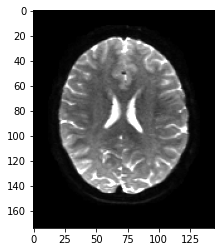

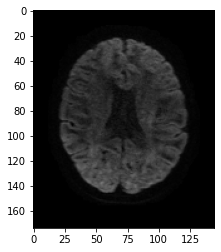

In [5]:
# Look at a single slice in a few channels
for i in range(0,2):
    plt.figure()
    plt.imshow(np.flipud(dwis[i,:,:,71].T),cmap='gray',vmax=10000)
    plt.show()

In [6]:
d_map = (np.log(dwis[0,:,:,71]) - np.log(dwis[1,:,:,71]))/bvals[1]

C:\Users\fl_cl\AppData\Local\Temp\ipykernel_22108\1139331770.py:1: RuntimeWarning: divide by zero encountered in log
  d_map = (np.log(dwis[0,:,:,71]) - np.log(dwis[1,:,:,71]))/bvals[1]
C:\Users\fl_cl\AppData\Local\Temp\ipykernel_22108\1139331770.py:1: RuntimeWarning: invalid value encountered in subtract
  d_map = (np.log(dwis[0,:,:,71]) - np.log(dwis[1,:,:,71]))/bvals[1]


In [7]:
# Map d using first two channels only.
d_map = np.zeros((Dx,Dy))
for i in range(1,Dx):
    for j in range(1,Dy):
        if dwis[0,i,j,71]>0 and dwis[1,i,j,71]>0:
            d_map[i,j]=(np.log(dwis[0,i,j,71]) - np.log(dwis[1,i,j,71]))/bvals[1];

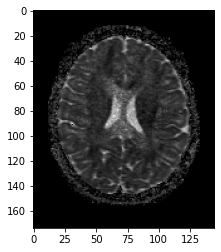

In [8]:
d_map[np.where(d_map<0)]=0
plt.figure()
plt.imshow(np.flipud(d_map.T),cmap='gray')
plt.show()

In [9]:
# Construct design matrix for linear estimation using all 108 measurements
G = np.array([np.ones(len(bvals)), -bvals]).T
Gi = np.linalg.pinv(G)
print(Gi)

[[ 5.55555555e-02  7.70603585e-08 -5.45175059e-08  5.10543977e-07
   4.96682857e-07 -1.07452548e-08  5.55555555e-02  3.42754978e-07
  -2.33139846e-07  1.23693723e-07  2.63121592e-07 -2.43378741e-07
   5.55555555e-02  2.59632701e-07 -4.39012204e-07 -2.05945383e-07
  -2.05639828e-07 -5.53075890e-07  5.55555555e-02 -5.78502073e-07
   7.18499448e-07 -6.47937008e-07 -4.09841636e-08  5.18311753e-08
   5.55555555e-02  4.73547834e-08 -7.68797984e-08  1.09610380e-07
  -4.98356687e-07 -2.34095402e-07  5.55555555e-02  3.75549444e-07
  -6.77341813e-08  3.32099415e-07 -3.88034392e-07 -4.45001096e-07
   5.55555555e-02  3.52031595e-07  3.01143839e-07 -4.35828868e-07
   3.65188326e-07 -3.11856564e-07  5.55555555e-02 -3.23139905e-07
   6.42358009e-07  1.48093739e-07  3.87327230e-07  3.20771630e-07
   5.55555555e-02  1.27993725e-07  5.45410667e-07 -5.92341757e-08
   3.64460548e-07 -3.48919089e-07  5.55555555e-02 -3.66273267e-07
   1.43238180e-07  4.00988350e-07  6.10063543e-07  6.24381267e-08
   5.55555

In [10]:
#Produce maps of d and S0 via linear least squares using all 108
# measurements
d_map = np.zeros((Dx,Dy))
S0_map = np.zeros((Dx,Dy))
for i in range(1,Dx):
    for j in range(1,Dy):
        A = dwis[:,i,j,71]
        if np.min(A)>0:
            [logS0, d] = Gi @ np.log(A)
            d_map[i,j]=d;
            S0_map[i,j]=np.exp(logS0)

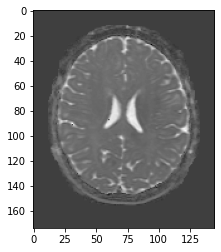

In [11]:
plt.figure()
plt.imshow(np.flipud(d_map.T),cmap='gray')
plt.show()

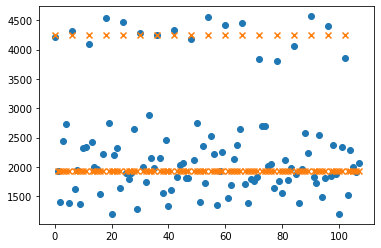

In [12]:
# Compare the data in one voxel with predictions from the
# simple isotropic diffusivity model.
avox = dwis[:,91,64,71]
xs = np.arange(0,len(avox))
plt.figure()
plt.scatter(xs, avox, marker='o')
model = np.exp(G @ np.array([np.log(S0_map[91,64]), d_map[91,64]]))
plt.scatter(xs, model, marker='x')
plt.show()

In [17]:
def ball_stick(x):
    # Behrens et al, 2003
    # Characterization and Propagation of Uncertainty in Diffusion-Weighted MR Imaging
    # https://doi.org/10.1002/mrm.10609
    
    # Extract the parameters
    # diff: diffusion
    # f: fraction of signal contributed by diffusion tensor along fiber direction theta, phi
    S0, diff, f, theta, phi = x
    
    # Fiber direction
    fibdir = np.array([
        np.cos(phi) * np.sin(theta),
        np.sin(phi) * np.sin(theta),
        np.cos(theta),
    ])
    
    # creates a 2D array of fibdir stacked ontop of each other len(bvals) times
    # so now has the dimensions [len(bvals)x3]
    tile = np.tile(fibdir, (len(bvals), 1))
    fibdotgrad = np.sum(qhat * tile, axis=1)
    
    S = S0 * (f * np.exp(-bvals * diff * (fibdotgrad**2)) + (1-f) * np.exp(-bvals * diff))
    return S


def BallStickSSD(x, voxel):
    S = ball_stick(x)
    # Compute sum of square differences
    return np.sum((voxel - S) ** 2)

In [14]:
# Use minimize for non-linear estimation of the ball-and-stick parameters
# The first starting point finds a spurious local min; the second
# a more reasonable min.
startx = np.array([3500, -5e-6, 120, 0, 0])
#startx = np.array([4200, 4e-4, 0.25, 0, 0])
results = minimize(
    fun=BallStickSSD,
    x0=startx,
    args=(avox,),
)

In [15]:
results

      fun: 28745638.342627514
 hess_inv: array([[ 1.29246299e-02, -1.18877135e-11,  1.22169585e-04,
        -1.48954463e-06, -1.37838418e-07],
       [-1.18877135e-11,  2.20352227e-18,  5.71917815e-11,
        -1.76240704e-14,  3.37015885e-14],
       [ 1.22169585e-04,  5.71917815e-11,  1.51629208e-03,
        -5.28067893e-07,  9.44167744e-07],
       [-1.48954463e-06, -1.76240705e-14, -5.28067894e-07,
         1.04838645e-08,  5.87120868e-09],
       [-1.37838417e-07,  3.37015885e-14,  9.44167744e-07,
         5.87120868e-09,  2.10266651e-08]])
      jac: array([-4.95000000e+01,  5.43978219e+10, -8.72250000e+02, -1.21485000e+05,
        7.78410000e+04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 342
      nit: 10
     njev: 55
   status: 2
  success: False
        x: array([ 3.52090396e+03, -5.13398653e-06,  1.17500032e+02,  8.86304840e-01,
        1.55795386e+00])